<a href="https://colab.research.google.com/github/JoaoCioffi/Kaggle/blob/main/Kickstarter/Kick_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

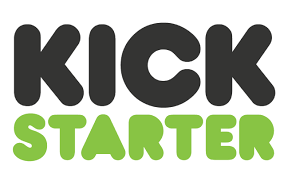

---
---
>>> Kickstarter Project - Crowdfunding Data
---
---


<https://www.kaggle.com/kemical/kickstarter-projects>

- Context: Kickstarter is a Crowdfunding platform. In this study we collected data using twitter.

- MetaData:

  - ID: internal Kickstarter id;
  - name: name of the project;
  - category: sub-category of the campaign;
  - main_category: general or "main" category of the campaign;
  - currency: currency used to support;
  - deadline: limit date stablished for the campaign;
  - goal: fundraising goal - The funding goal is the amount of money that a creator needs to complete the project;
  - launched: date campaign was launched;
  - pledged: total amount raised by "crowd";
  - state: current project status (i.e., canceled, successful, failed, etc);
  - backers: number of people donating to the project;
  - country: country where the capaign takes place;
  - usd_pledged: amount of money pledged converted to USD (according to Kickstarter's conversion) ;
  - usd_pledged_real: conversion in US dollars of the pledged column (conversion from Fixer.io API);
  - usd_goal_real: conversion in US dollars of the goal columns (conversion from Fixer.io API);


`Main Objectives:`
  - 1. Define the amount of data;
  - 2. What type(s) of variable(s) in each column?
  - 3. Describe numerical features:
    - (a) What are the total, the max, the min and the mean of the financial objective of all the Projects?
    - (b) What are the total, the max, the min and the mean of the raised money?
    - (c) What are the total, the max, the min and the mean of the Project Supporters?
  - 4. Describe the descriptive/categorical features:
    - (a) What is the most common 'category'? And how many unique values does it have?
    - (b) What is the most common 'Main_category'? And how many unique values does it have?
    - (c) What is the most common 'currency'? And how many unique values does it have?
    - (d) What is the most common 'country'? And how many unique values does it have?
  - 5. Verify Null values:
    - (a) How many null values are there in each category?
    - (b) What is the proportion of null values per non-null values in each feature?
  - 6. Graphical Analysis: Feature 'State' --> Barplot or Pie Chart that contains the quantity of each state
  - 7. Determine the percentage of each State present in the Dataset
  - 8. Graphical Analysis that contains the quantity of each state per 'main_category'
  - 9. From the previous graphic, select two 'main_category' to calculate the percentage of the state
  - 10. Analysis above the successful cases for the numerical features:
    - (a) What are the total, the max, the min and the mean of the financial objective of all the Projects?
    - (b) What are the total, the max, the min and the mean of the raised money?
    - (c) What are the total, the max, the min and the mean of the Project Supporters?
  - 11. Analysis above the successful cases for the categorical features:
     - (a) What is the most common 'category'? And how many unique values does it have?
     - (b) What is the most common 'Main_category'? And how many unique values does it have?
     - (c) What is the most common 'currency'? And how many unique values does it have?
     - (d) What is the most common 'country'? And how many unique values does it have?

`Extra Objective:`
- Build a model to predict (i) the amount of money pledged and/or (ii) if a project will be successful before it is released



# Main Libraries

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import patsy as pt
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge, Lasso

# Loading Dataset

In [2]:
df = pd.read_csv('Dataset_Kickstarter.csv', sep = ';')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09/10/2015,100000,11/08/2015 12:12,0,failed,0,GB,0.0,0,153395
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01/11/2017,3000000,02/09/2017 04:43,242100,failed,15,US,10000.0,242100,3000000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26/02/2013,4500000,12/01/2013 00:20,22000,failed,3,US,22000.0,22000,4500000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16/04/2012,500000,17/03/2012 03:24,100,failed,1,US,100.0,100,500000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29/08/2015,1950000,04/07/2015 08:35,128300,canceled,14,US,128300.0,128300,1950000


In [3]:
# Renaming Columns:
df.rename(columns = {'name':'Title','usd pledged': 'usd_pledged'},
          inplace = True)
df.columns

Index(['ID', 'Title', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

# Main Objective

## 1- Amount of Data

In [5]:
print(f'Rows:{df.shape[0]}')
print(f'Columns:{df.shape[1]}')

Rows:378661
Columns:15


## 2- Variables per Column

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   Title             378427 non-null  object 
 2   category          378390 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378461 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  int64  
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  int64  
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378411 non-null  object 
 12  usd_pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  int64  
 14  usd_goal_real     378661 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 43.3+ MB


In [7]:
# Changes the variable type
def change_type(df, feature, ast = object):
  """
  df: Pandas DataFrame to be modified
  feature: the column to be modified
  ast: set column astype (if not declared, automatically it will be setted as an object)
  """
  ast = str(ast)
  feature = str(feature)
  df[feature] = df[feature].astype(ast)
  return df

In [8]:
df = change_type(df, 'Title', 'string')
df = change_type(df, 'category', 'string')
df = change_type(df, 'main_category', 'string')
df = change_type(df, 'currency', 'string')
df = change_type(df, 'deadline', 'datetime64[ns]')
df = change_type(df, 'launched', 'datetime64[ns]')
df = change_type(df, 'state', 'string')
df = change_type(df, 'country', 'string')
df.dtypes

ID                           int64
Title                       string
category                    string
main_category               string
currency                    string
deadline            datetime64[ns]
goal                         int64
launched            datetime64[ns]
pledged                      int64
state                       string
backers                      int64
country                     string
usd_pledged                float64
usd_pledged_real             int64
usd_goal_real                int64
dtype: object

## 3- Describing numerical features

### (a) What are the total, the max, the min and the mean of the financial objective of all the Projects?

In [9]:
df.usd_goal_real.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

count    3.786610e+05
mean     4.545440e+06
std      1.152950e+08
min      1.000000e+00
1%       7.500000e+03
10%      7.000000e+04
25%      2.000000e+05
50%      5.500000e+05
75%      1.550000e+06
90%      4.500000e+06
99%      3.382241e+07
max      1.663614e+10
Name: usd_goal_real, dtype: float64

In [10]:
print(f'Total: {df.usd_goal_real.sum()}')
print(f'Max: {df.usd_goal_real.max()}')
print(f'Min: {float(df.usd_goal_real.min())}')
print(f'Mean: {np.mean(df.usd_goal_real)}')

Total: 1721180911331
Max: 16636139071
Min: 1.0
Mean: 4545440.146545327


### (b) What are the total, the max, the min and the mean of the raised money?

In [11]:
df.usd_pledged.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

count    3.748640e+05
mean     7.036729e+05
std      7.863975e+06
min      0.000000e+00
1%       0.000000e+00
10%      0.000000e+00
25%      1.698000e+03
50%      3.947200e+04
75%      3.034090e+05
90%      1.085970e+06
99%      9.624458e+06
max      2.033899e+09
Name: usd_pledged, dtype: float64

In [12]:
print(f'Total: {df.usd_pledged.sum()}')
print(f'Max: {df.usd_pledged.max()}')
print(f'Min: {float(df.usd_pledged.min())}')
print(f'Mean: {np.mean(df.usd_pledged)}')

Total: 263781633004.0
Max: 2033898627.0
Min: 0.0
Mean: 703672.8867109139


### (c) What are the total, the max, the min and the mean of the Project Supporters?

In [13]:
df.usd_pledged_real.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

count    3.786610e+05
mean     9.058924e+05
std      9.097334e+06
min      0.000000e+00
1%       0.000000e+00
10%      0.000000e+00
25%      3.100000e+03
50%      6.243300e+04
75%      4.050000e+05
90%      1.367099e+06
99%      1.226284e+07
max      2.033899e+09
Name: usd_pledged_real, dtype: float64

In [14]:
print(f'Total: {df.usd_pledged_real.sum()}')
print(f'Max: {df.usd_pledged_real.max()}')
print(f'Min: {float(df.usd_pledged_real.min())}')
print(f'Mean: {np.mean(df.usd_pledged_real)}')

Total: 343026124883
Max: 2033898627
Min: 0.0
Mean: 905892.4074119066


## 4- Describing categorical features

### (a) What is the most common 'category'? And how many unique values does it have?

In [15]:
df.category.value_counts()

Product Design     22300
Documentary        16132
Music              15712
Tabletop Games     14167
Shorts             12347
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, Length: 159, dtype: Int64

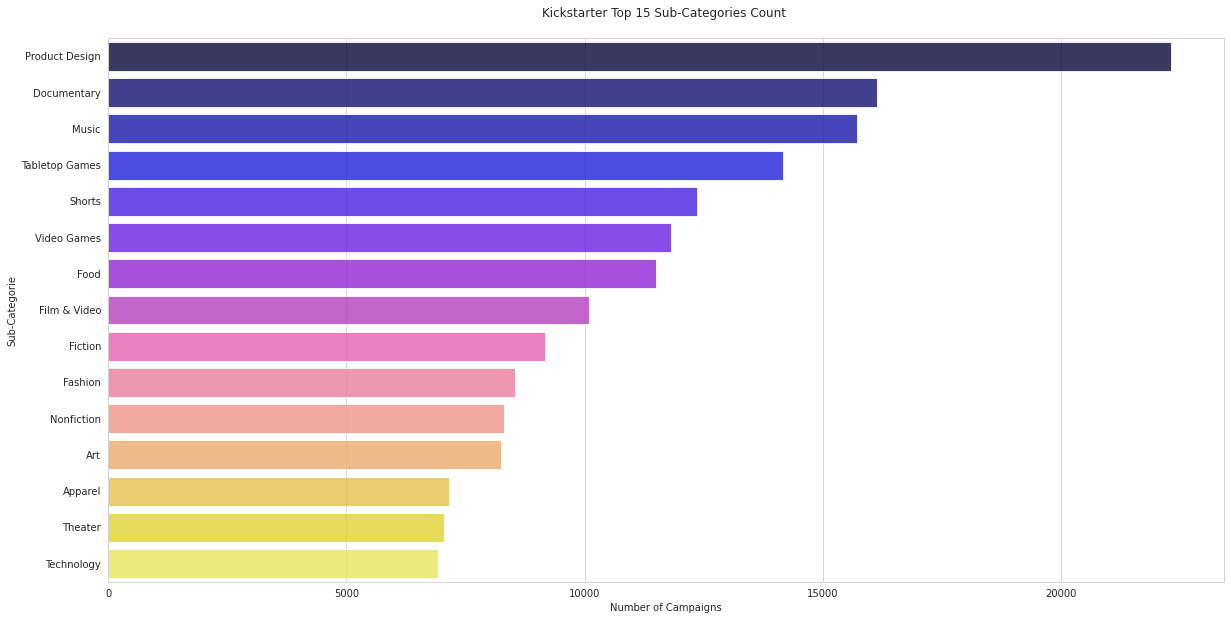

In [16]:
sns.set_style('whitegrid')
cat = df.category.value_counts().head(15)

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,1,1)
ax = sns.barplot(y=cat.index, x=cat.values, palette='gnuplot2', alpha=0.8)
plt.title('Kickstarter Top 15 Sub-Categories Count \n')
ax.set(xlabel='Number of Campaigns',ylabel='Sub-Categorie')
plt.show()

### (b) What is the most common 'Main_category'? And how many unique values does it have?



In [17]:
df.main_category.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: Int64

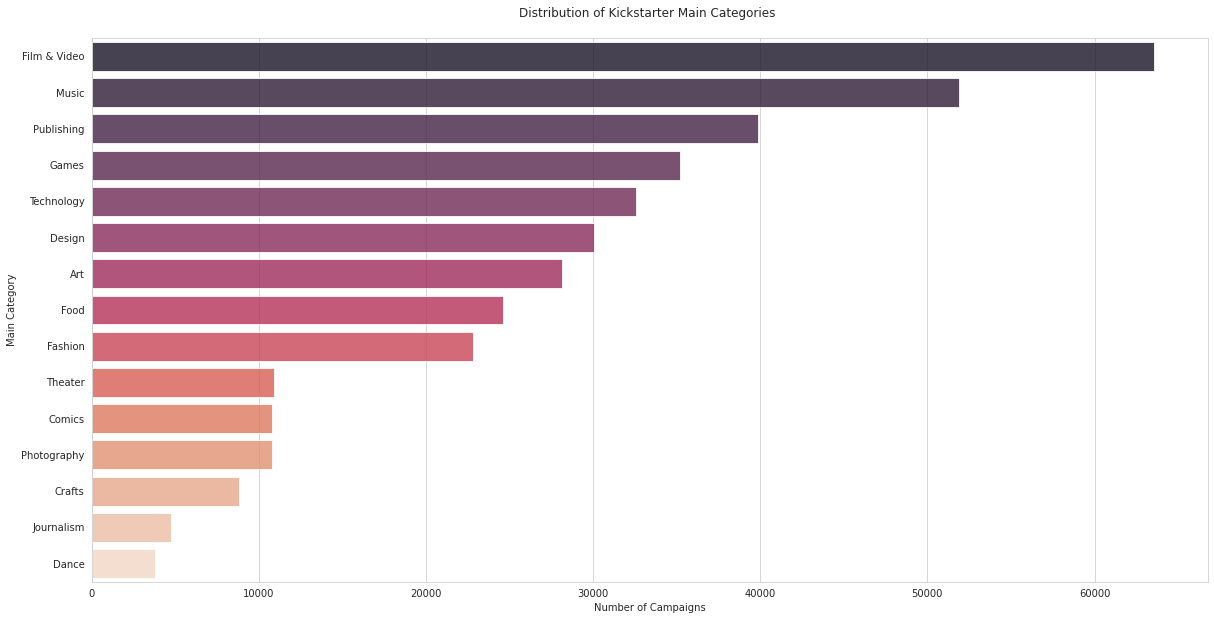

In [18]:
sns.set_style('whitegrid')
maincat = df.main_category.value_counts()

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,1,1)
ax = sns.barplot(y=maincat.index, x=maincat.values, palette='rocket', alpha=0.8)
plt.title('Distribution of Kickstarter Main Categories \n')
ax.set(xlabel='Number of Campaigns',ylabel='Main Category')
plt.show()

### (c) What is the most common 'currency'? And how many unique values does it have?

In [19]:
df.currency.value_counts()

USD    295199
GBP     34116
EUR     17401
CAD     14954
AUD      7946
SEK      1788
MXN      1751
NZD      1474
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: Int64

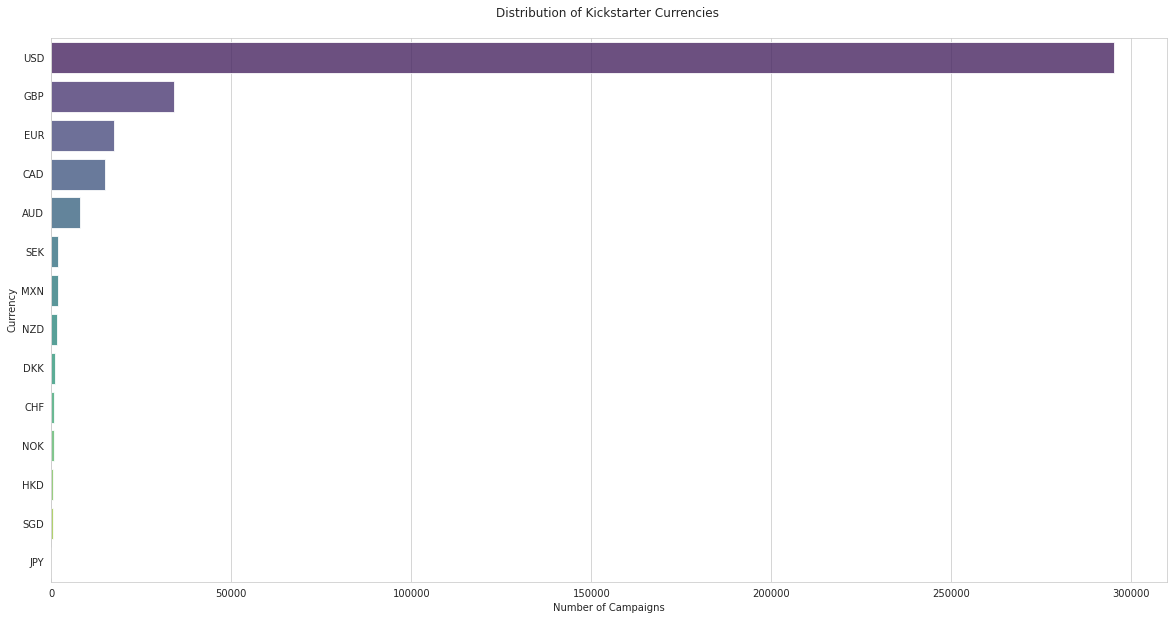

In [20]:
sns.set_style('whitegrid')
currency = df.currency.value_counts()

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,1,1)
ax = sns.barplot(y=currency.index, x=currency.values, palette='viridis', alpha=0.8)
plt.title('Distribution of Kickstarter Currencies \n')
ax.set(xlabel='Number of Campaigns',ylabel='Currency')
plt.show()

### (d) What is the most common 'country'? And how many unique values does it have?

In [21]:
df.country.value_counts()

US     292431
GB      33651
CA      14747
AU       7831
DE       4168
N0"      3795
FR       2937
IT       2876
NL       2867
ES       2273
SE       1757
MX       1752
NZ       1446
DK       1113
IE        811
CH        760
NO        708
HK        618
BE        617
AT        596
SG        555
LU         62
JP         40
Name: country, dtype: Int64

As we might know, `N0"` is not a country indeed. So we're gonna remove that data from our original DF

In [22]:
df = df[df.country != 'N0"']
df.country.value_counts()

US    292431
GB     33651
CA     14747
AU      7831
DE      4168
FR      2937
IT      2876
NL      2867
ES      2273
SE      1757
MX      1752
NZ      1446
DK      1113
IE       811
CH       760
NO       708
HK       618
BE       617
AT       596
SG       555
LU        62
JP        40
Name: country, dtype: Int64

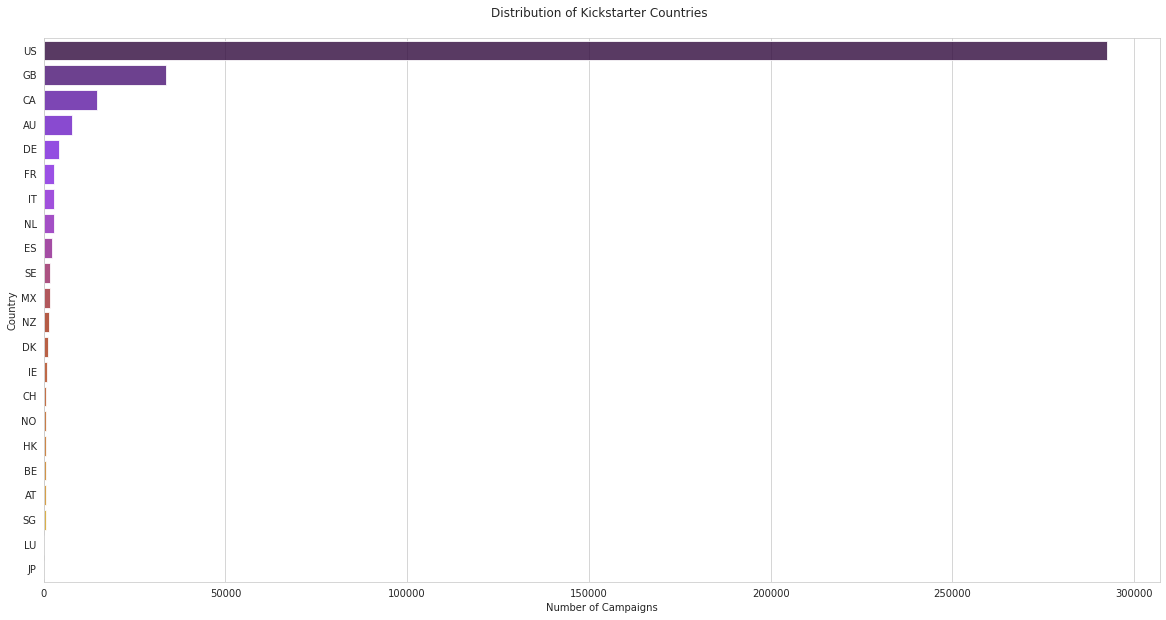

In [23]:
sns.set_style('whitegrid')
countries = df.country.value_counts()

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,1,1)
ax = sns.barplot(y=countries.index, x=countries.values, palette='gnuplot', alpha=0.8)
plt.title('Distribution of Kickstarter Countries \n')
ax.set(xlabel='Number of Campaigns',ylabel='Country')
plt.show()

## 5- Verifying Null Values

### (a) How many null values are there in each category?

In [24]:
df.isnull().sum()

ID                    0
Title               231
category            267
main_category         0
currency            198
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd_pledged           0
usd_pledged_real      0
usd_goal_real         0
dtype: int64

### (b) What is the proportion of null values per non-null values in each feature?

In [25]:
def sum_of_nulls(df):
  df_features = list(df.columns)
  total_nulls_per_feature = list(df.isnull().sum())

  for x in range(len(df_features)):
    print(df_features[x] + ' ~ ', round(((total_nulls_per_feature[x]/df.shape[0])*100), 5), '% of Nulls' )
  return None


sum_of_nulls(df)

ID ~  0.0 % of Nulls
Title ~  0.06166 % of Nulls
category ~  0.07127 % of Nulls
main_category ~  0.0 % of Nulls
currency ~  0.05285 % of Nulls
deadline ~  0.0 % of Nulls
goal ~  0.0 % of Nulls
launched ~  0.0 % of Nulls
pledged ~  0.0 % of Nulls
state ~  0.0 % of Nulls
backers ~  0.0 % of Nulls
country ~  0.0 % of Nulls
usd_pledged ~  0.0 % of Nulls
usd_pledged_real ~  0.0 % of Nulls
usd_goal_real ~  0.0 % of Nulls


## 6- Graphical Analysis: Feature 'State' --> Barplot or Pie Chart that contains the quantity of each state


In [26]:
# Creating a DF that contains the value_counts per state:
status_df = pd.DataFrame(df.state.value_counts())
status_df.reset_index()
status_df

,state
failed,197481
successful,133761
canceled,38736
live,2795
suspended,1843


In [27]:
status_values = list(df.state.unique()) #counts the unique types of this category
counts_values = list(status_df.state) #real counted values

# Creating a new DF summarizing the previous analysis:
status_df_remastered = pd.DataFrame({'Status':status_values, 'Counts':counts_values})
status_df_remastered

,Status,Counts
0,failed,197481
1,canceled,133761
2,successful,38736
3,live,2795
4,suspended,1843


>>> Bar-plot

Text(0, 0.5, 'Total')

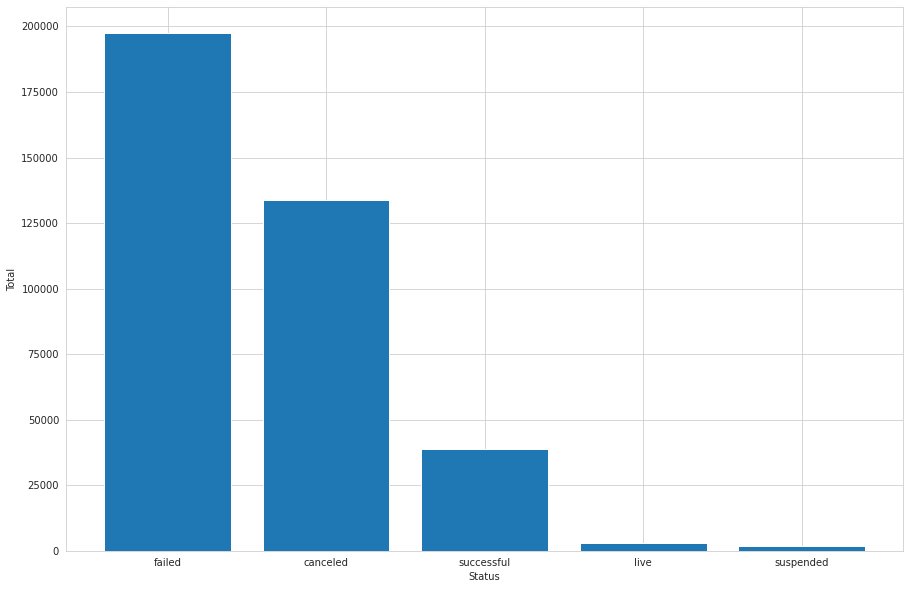

In [28]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(1,1,1)
ax1.bar(status_df_remastered.Status, status_df_remastered.Counts)
ax1.set_xlabel('Status')
ax1.set_ylabel('Total')

>>> Pie Chart

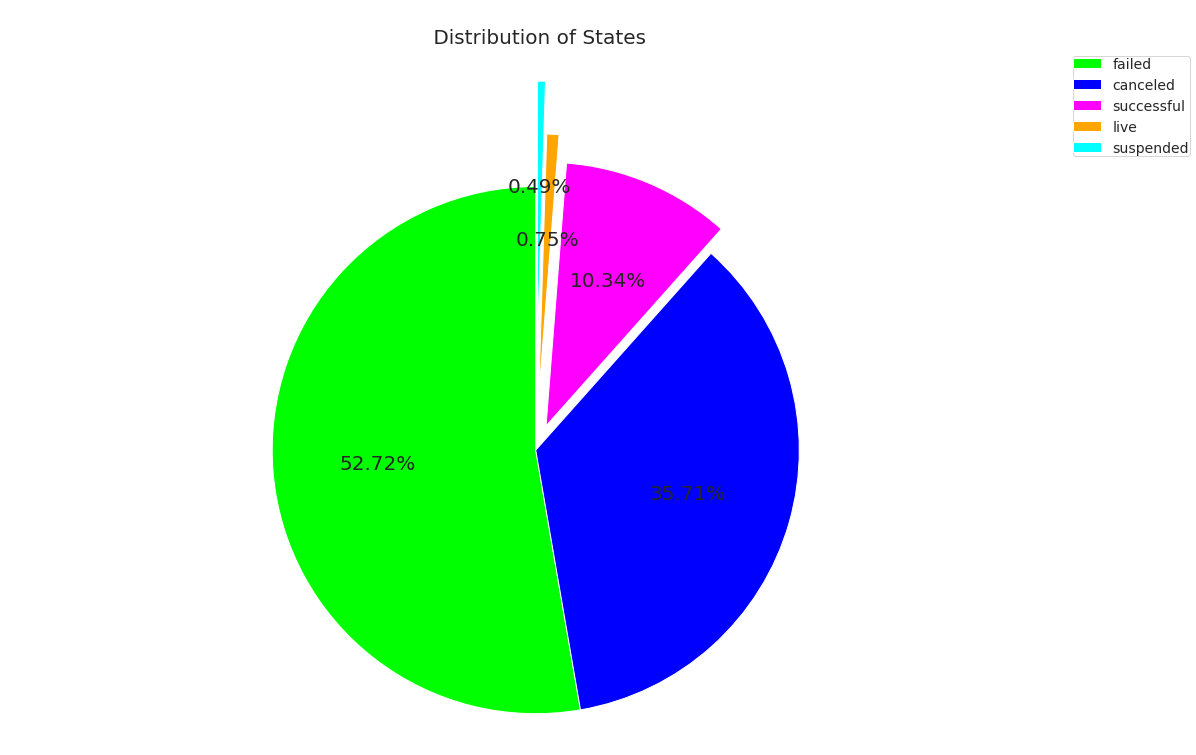

In [29]:
labels = list(status_df_remastered.Status)
sizes = list(status_df_remastered.Counts)

colors = ['Lime', 'Blue', 'Magenta', 'Orange', 'Cyan'] #stylistic choices
explode = [0,0,.1,.2,.4]

fig1, ax1 = plt.subplots(figsize=(15,10)) #creating pie chart, setting size

patches, texts, autotext = ax1.pie(sizes, colors=colors, startangle=90, autopct='%0.2f%%', explode=explode, textprops={'fontsize':20})

# Equal aspect ratio ensures that pie is drawn as circle
ax1.axis('equal')
plt.tight_layout()
plt.legend(labels, loc=2, borderpad=0.05, fontsize=14, bbox_to_anchor=(1,1)) #creating legend
plt.title('\n Distribution of States', fontsize=20)
plt.show()

## 7- Determine the percentage of each State present in the Dataset

In [30]:
status_df_perc = status_df_remastered.copy()
status_df_perc['Percentage'] = (status_df_perc.Counts/df.shape[0]) * 100
status_df_perc

,Status,Counts,Percentage
0,failed,197481,52.715581
1,canceled,133761,35.706163
2,successful,38736,10.340188
3,live,2795,0.746097
4,suspended,1843,0.491970


## 8- Graphical Analysis that contains the quantity of each state per 'main_category'

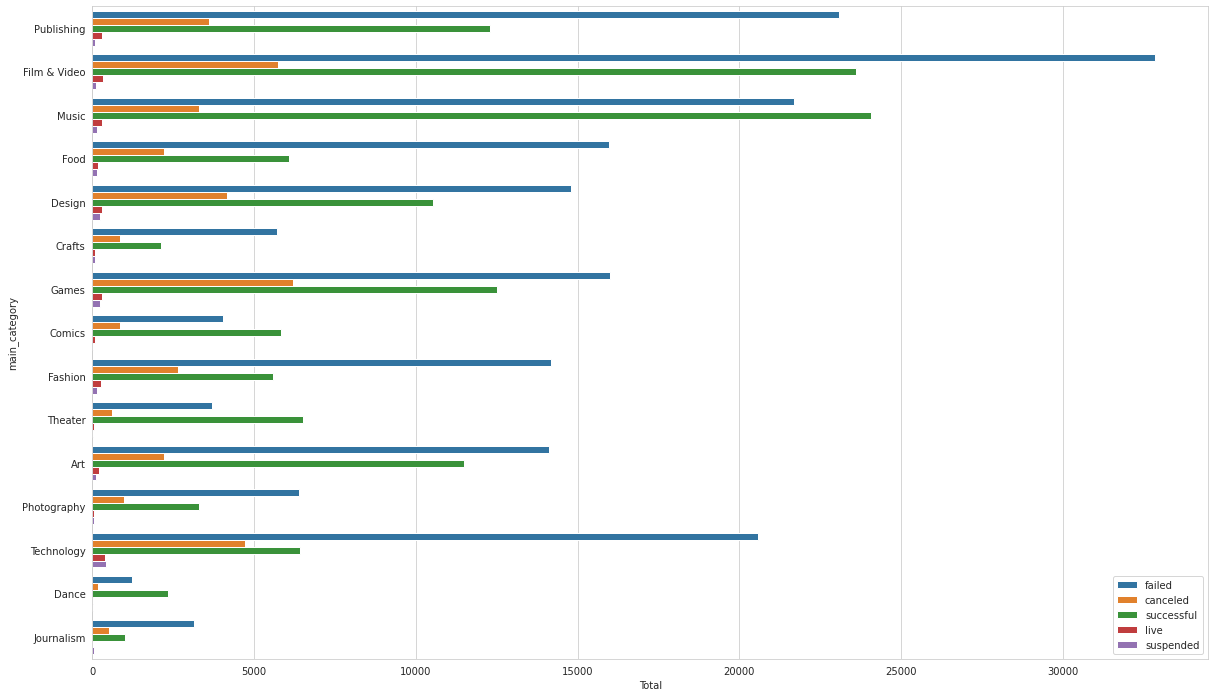

In [46]:
plt.figure(figsize=(20,12))
sns.countplot(y='main_category',data=df,hue='state')
plt.xlabel('Total')
plt.legend(loc = 'lower right')

## 9- From the previous graphic, select two 'main_category' to calculate the percentage of the state

In [32]:
df_state_per_main_cat = pd.DataFrame(df.groupby(['main_category','state']).count()['ID']).reset_index()
df_state_per_main_cat.rename(columns={'ID':'Total'}, inplace=True)
df_state_per_main_cat

,main_category,state,Total
0,Art,canceled,2221
1,Art,failed,14123
2,Art,live,194
3,Art,successful,11500
4,Art,suspended,96
...,...,...,...
70,Theater,canceled,608
71,Theater,failed,3706
72,Theater,live,41
73,Theater,successful,6525


In [33]:
choice = ['Music', 'Technology']

for c in choice:
  ans = df_state_per_main_cat
  ans = ans.loc[lambda ans: ans['main_category'] == c]
  ans['Percentage_of_State'] = (ans.Total/df.shape[0])*100
  print('\n\t\t\t',c)
  print('\n',ans,'\n')

  


			 Music

    main_category       state  Total  Percentage_of_State
50         Music    canceled   3298             0.880368
51         Music      failed  21686             5.788861
52         Music        live    281             0.075010
53         Music  successful  24088             6.430051
54         Music   suspended    148             0.039507 


			 Technology

    main_category       state  Total  Percentage_of_State
65    Technology    canceled   4714             1.258355
66    Technology      failed  20597             5.498163
67    Technology        live    377             0.100636
68    Technology  successful   6429             1.716157
69    Technology   suspended    424             0.113183 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 10- Analysis above the successful cases for the numerical features

In [34]:
# Selecting only 'successful' Projects:
df_successful = df.copy()
df_successful = df_successful.loc[lambda df_successful: df_successful['state'] == 'successful']
df_successful.head()

,ID,Title,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-01-04,5000000,2016-02-26 13:38:00,5237500,successful,224,US,5237500.0,5237500,5000000
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,100000,2014-01-12 18:30:00,120500,successful,16,US,120500.0,120500,100000
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-08-04,1250000,2013-09-03 06:42:00,1270000,successful,100,US,1270000.0,1270000,1250000
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-03-05,500000,2017-05-04 19:44:00,9417500,successful,761,GB,5776378.0,12185733,646973
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,25000,2012-02-08 14:11:00,25000,successful,7,US,25000.0,25000,25000


In [35]:
# Percentage of Successful Projects:
print(f'Percentage of successful projects related to the original DF ~ {round(((df_successful.shape[0]/df.shape[0])*100),5)} %')

Percentage of successful projects related to the original DF ~ 35.70616 %


### (a) What are the total, the max, the min and the mean of the financial objective of all the Projects?

In [36]:
df_successful.usd_goal_real.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

count    1.337610e+05
mean     9.537221e+05
std      2.797496e+06
min      1.000000e+00
1%       3.807400e+03
10%      5.000000e+04
25%      1.300320e+05
50%      3.840490e+05
75%      1.000000e+06
90%      2.000000e+06
99%      9.075593e+06
max      2.015609e+08
Name: usd_goal_real, dtype: float64

In [37]:
print(f'Total: {df_successful.usd_goal_real.sum()}')
print(f'Max: {df_successful.usd_goal_real.max()}')
print(f'Min: {float(df_successful.usd_goal_real.min())}')
print(f'Mean: {np.mean(df_successful.usd_goal_real)}')

Total: 127570823436
Max: 201560888
Min: 1.0
Mean: 953722.1120954538


### (b) What are the total, the max, the min and the mean of the raised money?

In [38]:
df_successful.usd_pledged.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

count    1.337610e+05
mean     1.735728e+06
std      1.301554e+07
min      0.000000e+00
1%       0.000000e+00
10%      3.211100e+04
25%      1.162000e+05
50%      3.656000e+05
75%      1.042556e+06
90%      2.785200e+06
99%      2.124893e+07
max      2.033899e+09
Name: usd_pledged, dtype: float64

In [39]:
print(f'Total: {df_successful.usd_pledged.sum()}')
print(f'Max: {df_successful.usd_pledged.max()}')
print(f'Min: {float(df_successful.usd_pledged.min())}')
print(f'Mean: {np.mean(df_successful.usd_pledged)}')

Total: 232172725144.0
Max: 2033898627.0
Min: 0.0
Mean: 1735728.0907289868


### (c) What are the total, the max, the min and the mean of the Project Supporters? 

In [40]:
df_successful.usd_pledged_real.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

count    1.337610e+05
mean     2.266826e+06
std      1.510041e+07
min      7.900000e+01
1%       1.200000e+04
10%      7.900000e+04
25%      2.000000e+05
50%      5.110000e+05
75%      1.324138e+06
90%      3.565000e+06
99%      2.981214e+07
max      2.033899e+09
Name: usd_pledged_real, dtype: float64

In [41]:
print(f'Total: {df_successful.usd_pledged_real.sum()}')
print(f'Max: {df_successful.usd_pledged_real.max()}')
print(f'Min: {float(df_successful.usd_pledged_real.min())}')
print(f'Mean: {np.mean(df_successful.usd_pledged_real)}')

Total: 303212864025
Max: 2033898627
Min: 79.0
Mean: 2266825.6369569604


## 11- Analysis above the successful cases for the categorical features:

### (a) What is the most common 'category'? And how many unique values does it have?

In [42]:
df_successful.category.value_counts()

Product Design     7948
Tabletop Games     7853
Shorts             6663
Music              6329
Documentary        5920
                   ... 
Weaving              27
Quilts               19
Embroidery           19
Literary Spaces      13
Taxidermy             5
Name: category, Length: 159, dtype: Int64

### (b) What is the most common 'Main_category'? And how many unique values does it have?



In [43]:
df_successful.main_category.value_counts()

Music           24088
Film & Video    23603
Games           12513
Publishing      12294
Art             11500
Design          10542
Theater          6525
Technology       6429
Food             6077
Comics           5835
Fashion          5590
Photography      3302
Dance            2337
Crafts           2115
Journalism       1011
Name: main_category, dtype: Int64

### (c) What is the most common 'currency'? And how many unique values does it have?

In [44]:
df_successful.currency.value_counts()

USD    109157
GBP     12052
CAD      4127
EUR      3876
AUD      2010
SEK       509
NZD       448
MXN       396
DKK       360
HKD       216
CHF       187
SGD       178
NOK       162
JPY         7
Name: currency, dtype: Int64

### (d) What is the most common 'country'? And how many unique values does it have?

In [45]:
df_successful.country.value_counts()

US    109219
GB     12060
CA      4131
AU      2010
DE       937
FR       908
NL       617
SE       509
ES       492
NZ       448
IT       439
MX       396
DK       360
HK       216
IE       207
CH       187
SG       178
NO       162
BE       152
AT       107
LU        19
JP         7
Name: country, dtype: Int64

# Extra Objective: build a model to predict (i) the amount of money pledged and/or (ii) if a project will be successful before it is released

In [47]:
# Creates a copy from the original DF (just for backup purposes)
df2 = df.copy()
df2.head()

,ID,Title,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-09-10,100000,2015-11-08 12:12:00,0,failed,0,GB,0.0,0,153395
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-01-11,3000000,2017-02-09 04:43:00,242100,failed,15,US,10000.0,242100,3000000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,4500000,2013-12-01 00:20:00,22000,failed,3,US,22000.0,22000,4500000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,500000,2012-03-17 03:24:00,100,failed,1,US,100.0,100,500000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,1950000,2015-04-07 08:35:00,128300,canceled,14,US,128300.0,128300,1950000


## 1- Preprocessing

### (a) Dropping NaN values

In [48]:
df2 = df2.dropna()
df2.isnull().sum()

ID                  0
Title               0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

### (b) Looking for duplicates

>>> Stands mainly for ID and/or Project Name

In [49]:
df2[df2['ID'].duplicated() == True]

,ID,Title,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real


In [50]:
len(df2[df2['ID'].duplicated() == True])

0

As we can see above, none of IDs were duplicated

In [51]:
df2[df2['Title'].duplicated() == True]

,ID,Title,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
6379,1032645935,Cancelled (Canceled),Design,Design,USD,2015-05-06,10000000,2015-06-05 12:29:00,310500,canceled,17,US,310500.0,310500,10000000
8356,1042208764,The Basement,Horror,Film & Video,USD,2015-07-05,1200000,2015-07-04 18:24:00,1231100,successful,106,US,1231100.0,1231100,1200000
8448,1042642941,The Gift,Film & Video,Film & Video,USD,2013-08-05,300000,2013-04-17 01:55:00,337000,successful,37,US,337000.0,337000,300000
8761,1044230780,Redemption,Narrative Film,Film & Video,USD,2012-08-25,1100000,2012-06-26 19:13:00,1144000,successful,67,US,1144000.0,1144000,1100000
9280,1046840222,Quick Quests: TCG,Tabletop Games,Games,USD,2016-01-09,100000,2016-08-20 03:31:00,43600,failed,16,US,30400.0,43600,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377889,996222702,Ready Set Train! - The workoutgame,Games,Games,EUR,2017-06-30,500000,2017-05-31 23:56:00,6500,failed,5,NL,5340.0,7418,570600
377988,996769069,The Last Straw,Photography,Photography,GBP,2016-07-12,65000,2016-06-11 22:08:00,65000,successful,15,GB,0.0,81770,81770
378027,996953473,Dead Inside,Shorts,Film & Video,USD,2011-02-04,500000,2011-01-25 18:57:00,0,failed,0,US,0.0,0,500000
378033,99698963,The Long Haul,Webseries,Film & Video,USD,2015-07-03,1000000,2015-05-02 21:26:00,10100,failed,2,US,10100.0,10100,1000000


In [52]:
len(df2[df2['Title'].duplicated() == True])

2798

In [53]:
len(df2[df2['Title'] == 'New EP/Music Development'])

13

It looks like there aren't any duplicates of IDs (which is good). That tells us that even though there seem to be some duplicates in the name category, they don't look like any of them are the same exact Project. There might be some people that just negligected to get creativi in the process of naming their Kickstarter - for instance, it's not hard to believe that more than one person names their Project "New EP/Music Development", so for now we're not going to worry too much about it

### (c) Checking if categorical and numerical variables are correctly setted

In [54]:
df2.dtypes

ID                           int64
Title                       string
category                    string
main_category               string
currency                    string
deadline            datetime64[ns]
goal                         int64
launched            datetime64[ns]
pledged                      int64
state                       string
backers                      int64
country                     string
usd_pledged                float64
usd_pledged_real             int64
usd_goal_real                int64
dtype: object

In [55]:
df2.category = df2.category.astype('category')
df2.main_category = df2.main_category.astype('category')
df2.currency = df2.currency.astype('category')
df2.state = df2.state.astype('category')
df2.country = df2.country.astype('category')
df2.dtypes

ID                           int64
Title                       string
category                  category
main_category             category
currency                  category
deadline            datetime64[ns]
goal                         int64
launched            datetime64[ns]
pledged                      int64
state                     category
backers                      int64
country                   category
usd_pledged                float64
usd_pledged_real             int64
usd_goal_real                int64
dtype: object

>>> Numerical Data

In [56]:
df2Num = df2.select_dtypes(include='number').drop(['ID'], axis = 1)
df2Num.head()

,goal,pledged,backers,usd_pledged,usd_pledged_real,usd_goal_real
0,100000,0,0,0.0,0,153395
1,3000000,242100,15,10000.0,242100,3000000
2,4500000,22000,3,22000.0,22000,4500000
3,500000,100,1,100.0,100,500000
4,1950000,128300,14,128300.0,128300,1950000


>>> Categorical Data

In [57]:
df2Cat = df2.select_dtypes(include='category')
df2Cat.head()

,category,main_category,currency,state,country
0,Poetry,Publishing,GBP,failed,GB
1,Narrative Film,Film & Video,USD,failed,US
2,Narrative Film,Film & Video,USD,failed,US
3,Music,Music,USD,failed,US
4,Film & Video,Film & Video,USD,canceled,US


## 2- Exploratory Data Analysis (EDA)

### (a) Distribution analysis for numerical data

>>> Pandas description with percentiles

In [58]:
df2Num.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

,goal,pledged,backers,usd_pledged,usd_pledged_real,usd_goal_real
count,3.739200e+05,3.739200e+05,373920.000000,3.739200e+05,3.739200e+05,3.739200e+05
mean,4.934107e+06,9.742552e+05,106.737711,7.034376e+05,9.111330e+05,4.567407e+06
std,1.186309e+08,9.586071e+06,912.707834,7.870614e+06,9.114898e+06,1.155559e+08
min,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e+00
1%,7.000000e+03,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,7.500000e+03
10%,6.500000e+04,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,7.000000e+04
25%,2.000000e+05,3.100000e+03,2.000000,1.698000e+03,3.100000e+03,2.000000e+05
50%,5.500000e+05,6.200000e+04,12.000000,3.944150e+04,6.240000e+04,5.500000e+05
75%,1.650000e+06,4.078415e+05,57.000000,3.033550e+05,4.050000e+05,1.600000e+06
90%,5.000000e+06,1.433510e+06,168.000000,1.085000e+06,1.386155e+06,4.604838e+06


>>> Distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


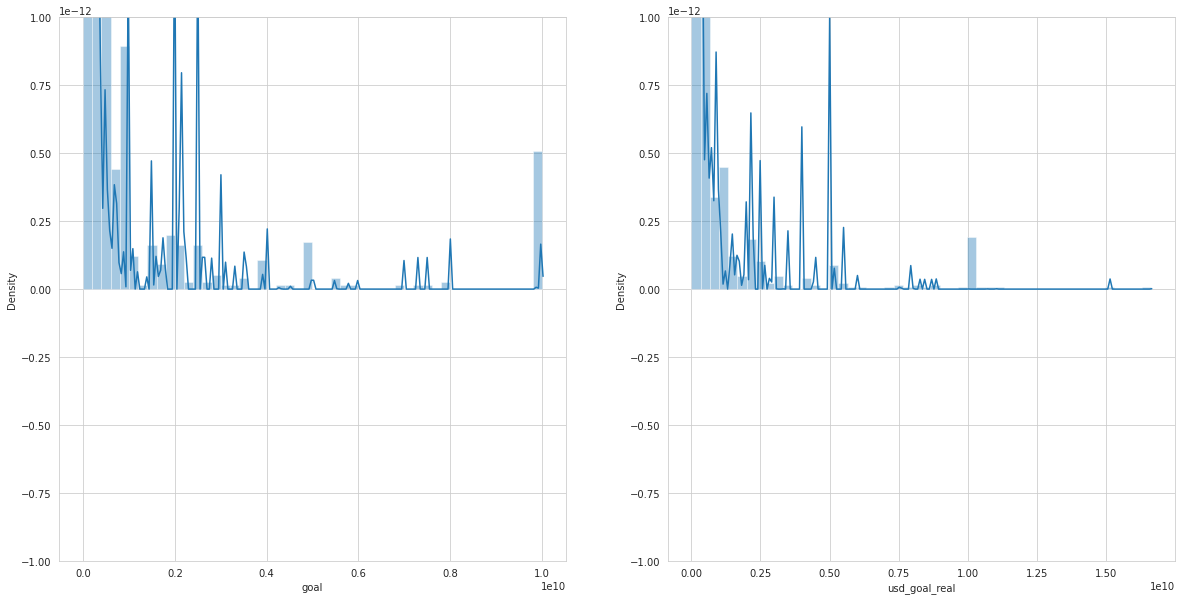

In [59]:
# Cria imagens vazias
fig = plt.figure(figsize = (20,10))

fig.add_subplot(1,2,1)
sns.distplot(df2Num.goal)


fig.add_subplot(1,2,2)
sns.distplot(df2Num.usd_goal_real)

>>> Histograms

In [60]:
contColNames = list(df2.select_dtypes(include='number').columns) #selects only numerical Features
ncols = 3
nrows = int(np.ceil(len(contColNames)/(1.0 * ncols)))

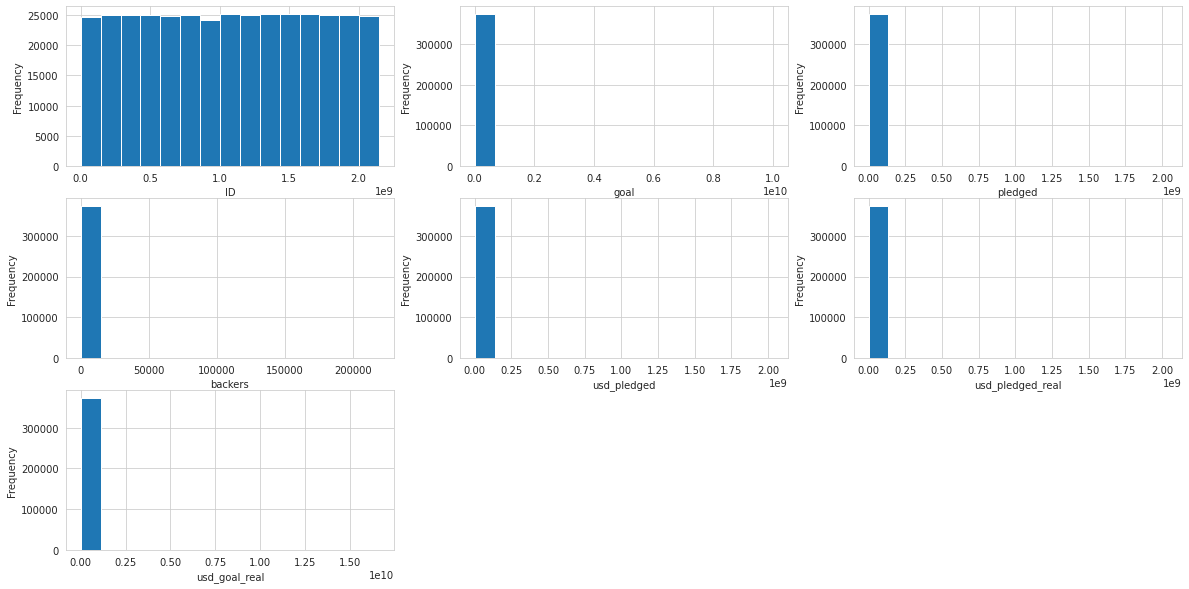

In [61]:
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,10))

counter = 0 

for i in range(nrows):
  for j in range(ncols):

    ax = axes[i][j]

    # Plotar somente quando houver dados
    if counter < len(contColNames):

      ax.hist(df2.select_dtypes(include='number')[contColNames[counter]], bins=15)
      ax.set_xlabel(contColNames[counter])
      ax.set_ylabel('Frequency')

    else:
      ax.set_axis_off()

    counter += 1

plt.show()

As we can see our numerical variables don't have normal distributions. We also notice that the financial features (usd_pledged, usd_pledged_real, usd_goal_real) and backers look somewhat zero-heavy

In [62]:
total_0_bckrs = (df.backers == 0).sum()
print(f'Percentage of 0 backers projects: ~ {round(((total_0_bckrs/df2.shape[0]) * 100),5)}%')

Percentage of 0 backers projects: ~ 13.84895%


There are about 50000.00 projects with 0 backers which accounts roughly 14% of the data. That's a lot of data and it could provide interesting insights as to why some Kickstarters are not successful at all, so we're gonna live it in.

Beyond it, we can also look at the top-10 backers:

In [63]:
Top10_backers = df2.backers.nlargest(10)
Top10_backers

187652    219382
75900     154926
292244    105857
148585     91585
182657     87142
23404      85581
157270     78471
239175     74405
272924     73986
38291      73206
Name: backers, dtype: int64

In [64]:
# Looking at some of these 'best' backers:
print(df2.iloc[187652],'\n\n')
print(df2.iloc[75900],'\n\n')

ID                                        1965733225
Title               Turner Alley Sustainable Sandals
category                                     Fashion
main_category                                Fashion
currency                                         USD
deadline                         2011-12-12 00:00:00
goal                                          400000
launched                         2011-12-11 22:00:00
pledged                                        96500
state                                         failed
backers                                           15
country                                           US
usd_pledged                                    96500
usd_pledged_real                               96500
usd_goal_real                                 400000
Name: 189739, dtype: object 


ID                                                         1390966364
Title               ONE NIGHT THEATRICAL GRINDHOUSE DOUBLE FEATURE...
category                          

>>> Box-Plot

Text(0, 0.5, 'Backers')

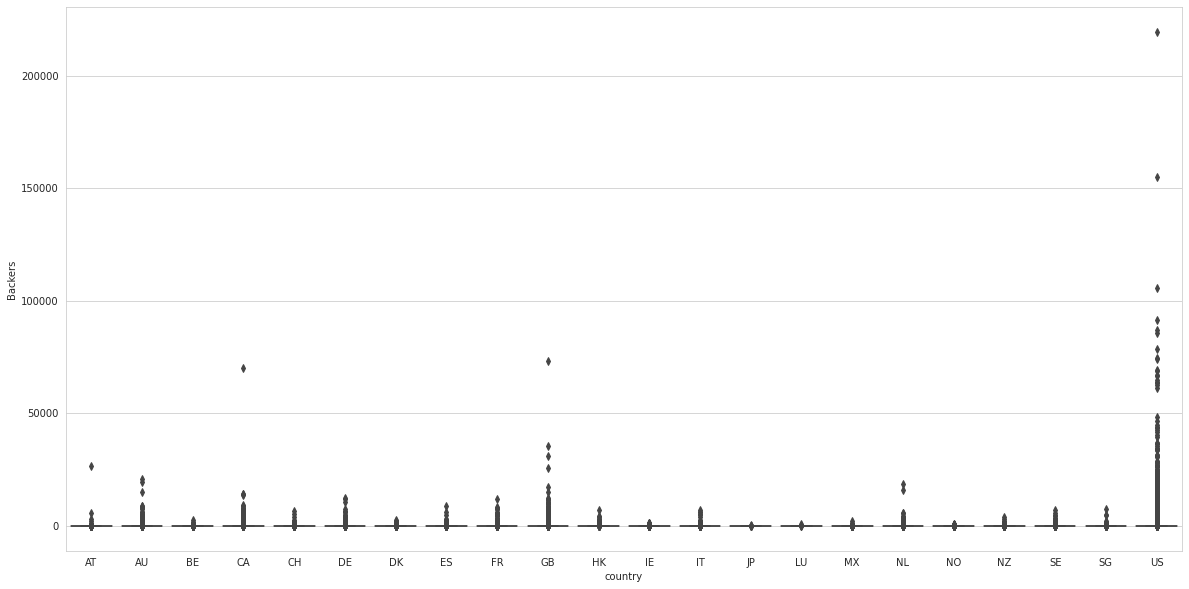

In [65]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(x = df2.country, y = df2.backers)
plt.ylabel('Backers',fontsize = 10)

### (b) Feature Exctraction for EDA

Now we're gonna create new Features from our existing data to exctract more information. We are interested in both of the datetime columns and as well as both of the category columns

In [66]:
df2.columns

Index(['ID', 'Title', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [ ]:
df2['span_of_project'] = (df2.deadline - df2.launched).dt.days
df2['delay'] = [True if x < 0 else False for x in df2.span_of_project]
df2['release_year'] = pd.to_datetime(df2.launched, format="%Y/%m/%d").dt.year
df2['release_month'] = pd.to_datetime(df2.launched, format="%Y/%m/%d").dt.month
df2['release_day_of_month'] = pd.to_datetime(df2.launched, format="%Y/%m/%d").dt.day
df2['release_day_of_week'] = pd.to_datetime(df2.launched, format="%Y/%m/%d").dt.dayofweek

df2.head()

In [ ]:
# Checking the Time distribution:
print(f'Registry: from {min(df2.release_year)} to {max(df2.release_year)}')
print('\n',df2.release_year.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99]))

In [69]:
df2.release_year.nsmallest(10)

2842      1970
48147     1970
75397     1970
94579     1970
247913    1970
273779    1970
319002    1970
643       2009
1293      2009
1992      2009
Name: release_year, dtype: int64

The date distribution seems very inconsistent. Perry Chen founded Kickstarter in 2009: 

<https://www.kickstarter.com/about?ref=global-footer#the-full-story>,

so we need to get rid of those

In [70]:
original_len = len(df2)

df2 = df2[df2.release_year > 1970]

filtered_len = len(df2)

print('A total of ', original_len - filtered_len, ' data were dropped based on the previous inconsistency')

A total of  7  data were dropped based on the previous inconsistency


### (c) EDA based on Success of Kickstarters

We also want to be able to reference whether a project was successful or not

In [71]:
status_df_remastered.Status

0        failed
1      canceled
2    successful
3          live
4     suspended
Name: Status, dtype: object

In [72]:
df2_successful = df2.loc[lambda df2: df2['state'] == 'successful']
df2_suspended = df2.loc[lambda df2: df2['state'] == 'suspended']
df2_live = df2.loc[lambda df2: df2['state'] == 'live']
df2_canceled = df2.loc[lambda df2: df2['state'] == 'canceled']
df2_failed = df2.loc[lambda df2: df2['state'] == 'failed']

print(df2_successful.head(),'\n\n')
print(df2_suspended.head(),'\n\n')
print(df2_live.head(),'\n\n')
print(df2_canceled.head(),'\n\n')
print(df2_failed.head(),'\n\n')

            ID  ... release_day_of_week
5   1000014025  ...                   4
6   1000023410  ...                   6
11   100005484  ...                   1
14  1000057089  ...                   3
18  1000070642  ...                   2

[5 rows x 21 columns] 


              ID  ... release_day_of_week
374   1001732009  ...                   0
688   1003367610  ...                   0
689   1003378025  ...                   4
1047   100524873  ...                   2
1114  1005618996  ...                   3

[5 rows x 21 columns] 


             ID  ... release_day_of_week
40   1000149007  ...                   0
458  1002183790  ...                   3
537  1002599057  ...                   0
544  1002629894  ...                   3
627   100301082  ...                   0

[5 rows x 21 columns] 


            ID  ... release_day_of_week
4   1000011046  ...                   1
8   1000034518  ...                   3
9    100004195  ...                   4
68  1000256760  ...     

In [73]:
print(f'Average Number of Backers of Failed Kickstarters:\n{round((df2_failed.backers.mean()),5)}')
print('-'*50)
print(f'Average Number of Backers of Successful Kickstarters:\n{round((df2_successful.backers.mean()),5)}')
print('-'*50)
print(f'Average Number of Backers of Canceled Kickstarters:\n{round((df2_canceled.backers.mean()),5)}')

Average Number of Backers of Failed Kickstarters:
16.43212
--------------------------------------------------
Average Number of Backers of Successful Kickstarters:
264.32026
--------------------------------------------------
Average Number of Backers of Canceled Kickstarters:
26.02928


It's interesting that the number of backers for successful campaigns is much higher than unsuccessful ones (obviously, the more backers a campaign has, the more probability of being successful). But that number is probably inflated because of super successful capaign that go viral from time to time

In [74]:
print(f'Average Duration (in days) of Failed Kickstarters:\n{round((df2_failed.span_of_project.mean()),5)}')
print('-'*50)
print(f'Average Duration (in days) of Successful Kickstarters:\n{round((df2_successful.span_of_project.mean()),5)}')
print('-'*50)
print(f'Average Duration (in days) of Canceled Kickstarters:\n{round((df2_canceled.span_of_project.mean()),5)}')

Average Duration (in days) of Failed Kickstarters:
28.79512
--------------------------------------------------
Average Duration (in days) of Successful Kickstarters:
24.8317
--------------------------------------------------
Average Duration (in days) of Canceled Kickstarters:
29.45227


It looks like most kickstarters stay up for about 28 days. This means that after a month you can pretty much tell whether or not your kickstarter will take off (in spite of having no much difference between the successful and the failed/canceled ones)

>>> Analysis by Year

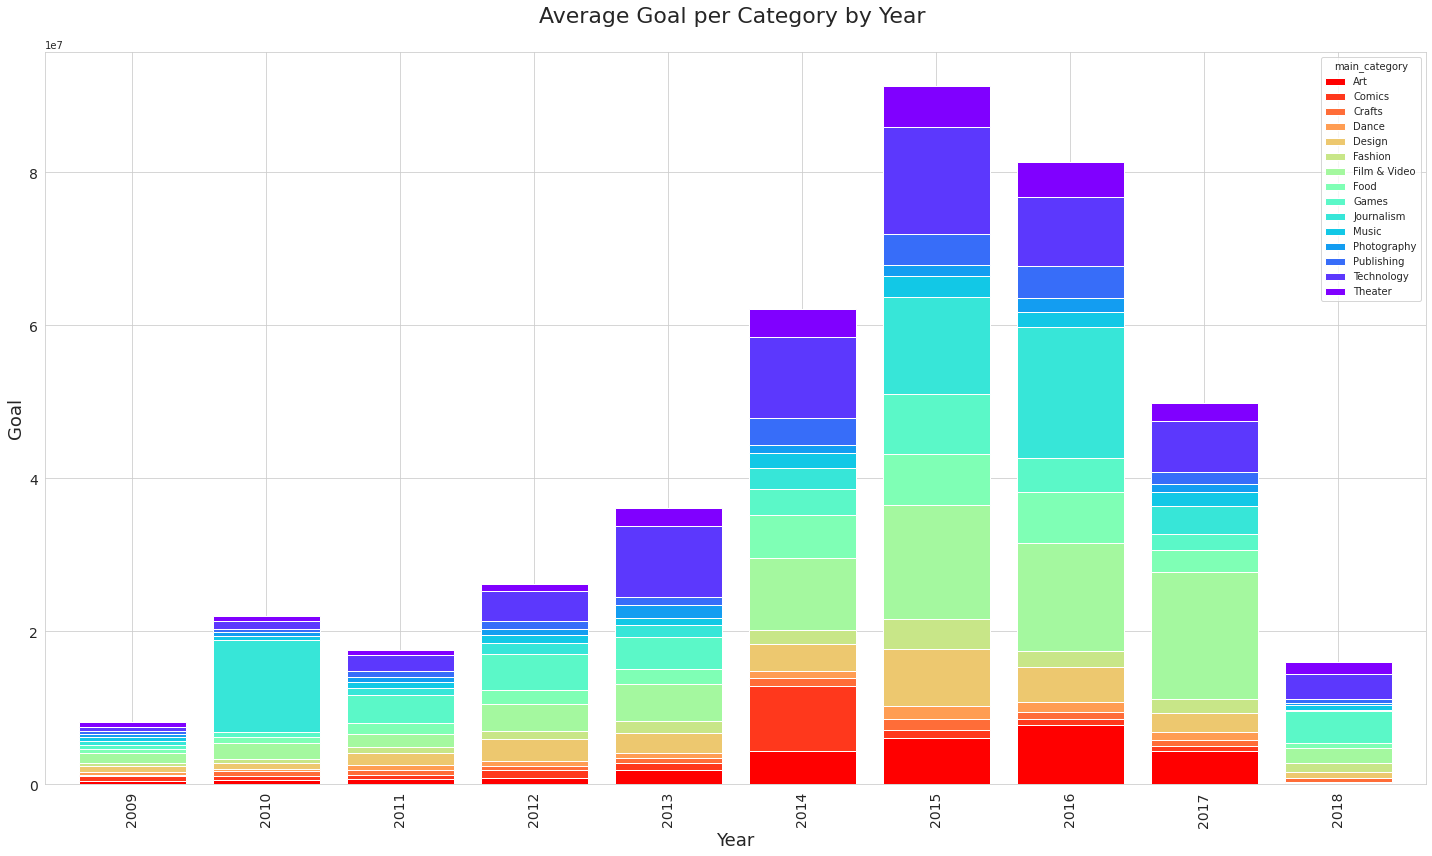

In [75]:
"""
Colormap:
Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r',
'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r',
'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r',
'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r',
'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd',
'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r',
'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2',
'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn',
'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r',
'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r',
'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm',
'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r',
'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray',
'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow',
'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot',
'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv',
'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r'
"""

ax1 = plt.subplot(1,1,1)
df2.groupby(['release_year', 'main_category'])['usd_goal_real'].mean().unstack().plot(kind='bar', figsize=(20,12), stacked=True, width=0.8, colormap='rainbow_r', ax=ax1)

plt.title('Average Goal per Category by Year \n', fontsize=22)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Goal',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout() #keeps labels from overlapping
plt.show()

It looks like most categories follow the overall trend of increasing their goal as Kickstarter gained more popularity over the years (and then decreasing average goal amount as kickstarter started losing traction starting in 20116). A few parts of the graph that jump out seems to be journalism, which shows a disproportionate amount of growth between 2009 and 2010 and again a few years later between 2014 and 2015. Otherwise it looks like technology pretty consistently had the most ambitious goals each year and some categories (such as games and music) showed low averages (even considerating their popularity)

In [76]:
import plotly
from plotly import tools
import plotly.graph_objs as go
import plotly.offline as pyo    

"""
Plotly Colors:
aliceblue, antiquewhite, aqua, aquamarine, azure,
beige, bisque, black, blanchedalmond, blue,
blueviolet, brown, burlywood, cadetblue,
chartreuse, chocolate, coral, cornflowerblue,
cornsilk, crimson, cyan, darkblue, darkcyan,
darkgoldenrod, darkgray, darkgrey, darkgreen,
darkkhaki, darkmagenta, darkolivegreen, darkorange,
darkorchid, darkred, darksalmon, darkseagreen,
darkslateblue, darkslategray, darkslategrey,
darkturquoise, darkviolet, deeppink, deepskyblue,
dimgray, dimgrey, dodgerblue, firebrick,
floralwhite, forestgreen, fuchsia, gainsboro,
ghostwhite, gold, goldenrod, gray, grey, green,
greenyellow, honeydew, hotpink, indianred, indigo,
ivory, khaki, lavender, lavenderblush, lawngreen,
lemonchiffon, lightblue, lightcoral, lightcyan,
lightgoldenrodyellow, lightgray, lightgrey,
lightgreen, lightpink, lightsalmon, lightseagreen,
lightskyblue, lightslategray, lightslategrey,
lightsteelblue, lightyellow, lime, limegreen,
linen, magenta, maroon, mediumaquamarine,
mediumblue, mediumorchid, mediumpurple,
mediumseagreen, mediumslateblue, mediumspringgreen,
mediumturquoise, mediumvioletred, midnightblue,
mintcream, mistyrose, moccasin, navajowhite, navy,
oldlace, olive, olivedrab, orange, orangered,
orchid, palegoldenrod, palegreen, paleturquoise,
palevioletred, papayawhip, peachpuff, peru, pink,
plum, powderblue, purple, red, rosybrown,
royalblue, rebeccapurple, saddlebrown, salmon,
sandybrown, seagreen, seashell, sienna, silver,
skyblue, slateblue, slategray, slategrey, snow,
springgreen, steelblue, tan, teal, thistle, tomato,
turquoise, violet, wheat, white, whitesmoke,
yellow, yellowgreen
"""


import warnings
warnings.filterwarnings('ignore')


#-------- Successful Data --------#
# Success X year
trace1 = go.Bar(
    x = df2_successful.release_year.value_counts().index, #references our data
    y = df2_successful.release_year.value_counts().values,
    marker = dict(color='firebrick'),
    name = 'Success/Year'
)

# Success X month
trace2 = go.Bar(
    x = df2_successful.release_month.value_counts().index, #references our data
    y = df2_successful.release_month.value_counts().values,
    marker = dict(color='lime'),
    name = 'Success/Month'
)

# Success X day of month
trace3 = go.Bar(
    x = df2_successful.release_day_of_month.value_counts().index, #references our data
    y = df2_successful.release_day_of_month.value_counts().values,
    marker = dict(color='blue'),
    name = 'Success/Day_of_Month'
)

# Success X day of week
trace4 = go.Bar(
    x = df2_successful.release_day_of_week.value_counts().index, #references our data
    y = df2_successful.release_day_of_week.value_counts().values,
    marker = dict(color='gold'),
    name = 'Success/Day_of_Week'
)


#-------- Fail Data --------#
# Fail X year
trace5 = go.Bar(
    x = df2_failed.release_year.value_counts().index, #references our data
    y = df2_failed.release_year.value_counts().values,
    marker = dict(color='mediumseagreen'),
    name = 'Fail/Year'
)

# Fail X month
trace6 = go.Bar(
    x = df2_failed.release_month.value_counts().index, #references our data
    y = df2_failed.release_month.value_counts().values,
    marker = dict(color='orange'),
    name = 'Fail/Month'
)

# Fail X day of month
trace7 = go.Bar(
    x = df2_failed.release_day_of_month.value_counts().index, #references our data
    y = df2_failed.release_day_of_month.value_counts().values,
    marker = dict(color='dimgray'),
    name = 'Fail/Day_of_Month'
)

# Fail X day of month
trace8 = go.Bar(
    x = df2_failed.release_day_of_week.value_counts().index, #references our data
    y = df2_failed.release_day_of_week.value_counts().values,
    marker = dict(color='lightcoral'),
    name = 'Fail/Day_of_Week'
)


fig = tools.make_subplots(rows=2, cols=4, subplot_titles=('Successful x Release Year','Successful x Release Month','Successful x Release Day of Month','Successful x Release Day of Week',
                                                          'Failed x Release Year','Failed x Release Month','Failed x Release Day of Month', 'Failed x Release Day of Week'))

# Adding each to graphic
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 1, 4)
fig.append_trace(trace5, 2, 1)
fig.append_trace(trace6, 2, 2)
fig.append_trace(trace7, 2, 3)
fig.append_trace(trace8, 2, 4)

fig['layout'].update(height=650, width=1750, title='.::. Time of Launch x Success of Kickstarters .::. \n\n\n')
fig.show()

*Note: days of the week start with Sunday as '0'

The amount of failed campaigns greatly outnumbers the amount of successful ones, so the numbers in the failed campaign graphs are all much higher than the numbers in the successful campaign graphs. However, it looks like the trends for day, month and year are pretty similar between failed and successful campaigns. This could reflect the trend of when people tend to make posts in general. It looks like people are actually most inspired to start chasing their dreams on a Monday ("fresh start effect" - More at <https://www.psychologytoday.com/us/blog/ritual-and-the-brain/201811/the-unexpected-science-fresh-starts-and-failures>) and as the week goes on, it appears that people are less likely to launch successful or failed campaigns. As for month, it seems that failed campaigns are sightly more likely to be launched in July than any other month. When looking at year, it seems to be more successful than failed campaigns were actually pretty equal in 2009 and 2010, and then once it started picking up on popularty, failed campaigns of course started to outnumber successful ones

In [79]:
# Analysis for sub-categories

trace1 = go.Bar(
    x = df2_successful.category.value_counts().index,
    y = df2_successful.category.value_counts().values,
    name = 'Successful'
)

trace2 = go.Bar(
    x = df2_failed.category.value_counts().index,
    y = df2_failed.category.value_counts().values,
    name = 'Failed'
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Successful x Sub Category', 'Failed x Sub Category'))
fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig['layout'].update(height=650, width=1750, title='.::. Top Subcategories for Successful and Failed Kickstarters.::. \n\n\n')
fig.show()

Product Design is pretty big in both successful and failed campaigns, as is Documentary, wich makes sense as both were very popular sub-categories overall. Electronic-Music and Anthologies also made the cut to be included on both graphs, landing roughly in the middle of each graph. Other than those, it doesn't seem like there's a whole lot of overlap between the plots, which means that sub-categorie could be a good predictor on whether or not your kickstarter will succeed

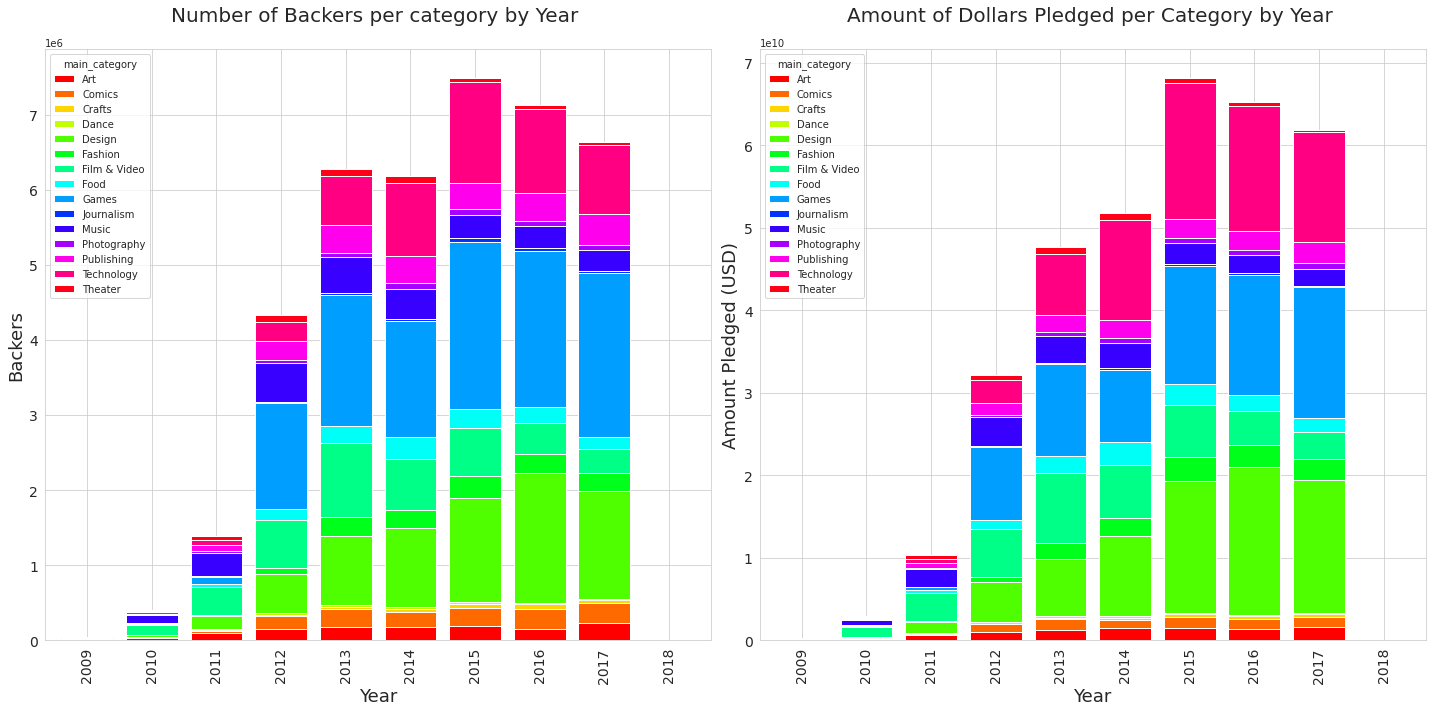

In [78]:
ax1 = plt.subplot(1,2,1)
df2.groupby(["release_year", "main_category"])["backers"].sum().unstack().plot(kind='bar', figsize=(20,10), stacked=True, width=0.8, colormap='hsv', ax=ax1)
plt.title('Number of Backers per category by Year \n', fontsize=20)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Backers',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax2 = plt.subplot(1,2,2)
df2.groupby(["release_year", "main_category"])["usd_pledged_real"].sum().unstack().plot(kind='bar', figsize=(20,10), stacked=True, width=0.8, colormap='hsv', ax=ax2)
plt.title('Amount of Dollars Pledged per Category by Year \n', fontsize=20)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Amount Pledged (USD)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.tight_layout() #keeps labels from overlapping
plt.show()

Number of backers and amount pledged seemed to follow the same pattern of increasing/decreasing throughout the years, with the exception of the jump between 2013~2014, when the number of backers decreases but amount pledged increasesm which is interesting. It looks like the distribution of backers X categories stays pretty consistent throughout the graph (i.e., Games dominates over the other backers every year after 2011, while Art and Theater are pretty much last place every year). The distribution changes a little bit in the Pledged graph, however, w/ Technology starting of less popular than Games, but soon edging it out come 2014.

It's notable that some categories, such as Games, have a higher average of backers than other categories but fail to have as many dollars pledged, while the opposite is true for Technology, which has a lower average amount of backers, but the Avg donation for a tech campaign is typically larger than for other areas. This can be explained because people perhaps have more confidence in the Tech Industry than they do in Gaming Industry, since the first one is every-booming and is seen as leading the future. Let's take a closer look at this with our pledge_per_backer variable:

## 3- Building the Model

In [138]:
df3 = df2.copy()
print(df3.shape,'\n\n')
print(df3.info(verbose=True),'\n\n')

(373913, 21) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 373913 entries, 0 to 378660
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    373913 non-null  int64         
 1   Title                 373913 non-null  string        
 2   category              373913 non-null  category      
 3   main_category         373913 non-null  category      
 4   currency              373913 non-null  category      
 5   deadline              373913 non-null  datetime64[ns]
 6   goal                  373913 non-null  int64         
 7   launched              373913 non-null  datetime64[ns]
 8   pledged               373913 non-null  int64         
 9   state                 373913 non-null  category      
 10  backers               373913 non-null  int64         
 11  country               373913 non-null  category      
 12  usd_pledged           373913 non-null  flo

### (a) Slicing our DataFrame: Numerical Vs. Categorical Features

In [139]:
# Categorical
df3_Cat = df3.select_dtypes(include='category')
df3_Cat.head()

,category,main_category,currency,state,country
0,Poetry,Publishing,GBP,failed,GB
1,Narrative Film,Film & Video,USD,failed,US
2,Narrative Film,Film & Video,USD,failed,US
3,Music,Music,USD,failed,US
4,Film & Video,Film & Video,USD,canceled,US


In [140]:
df3_Cat_Dum = pd.get_dummies(df3_Cat)
df3_Cat_Dum.head()

,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,category_Anthologies,category_Apparel,category_Apps,category_Architecture,category_Art,category_Art Books,category_Audio,category_Bacon,category_Blues,category_Calendars,category_Camera Equipment,category_Candles,category_Ceramics,category_Children's Books,category_Childrenswear,category_Chiptune,category_Civic Design,category_Classical Music,category_Comedy,category_Comic Books,category_Comics,category_Community Gardens,category_Conceptual Art,category_Cookbooks,category_Country & Folk,category_Couture,category_Crafts,category_Crochet,category_DIY,category_DIY Electronics,category_Dance,category_Design,category_Digital Art,category_Documentary,...,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,state_canceled,state_failed,state_live,state_successful,state_suspended,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [141]:
df3Num = df3.select_dtypes(include='number').drop(['ID','goal','usd_pledged','usd_pledged_real'], axis = 1)
df3Num.head()

,pledged,backers,usd_goal_real,span_of_project,release_year,release_month,release_day_of_month,release_day_of_week
0,0,0,153395,-60,2015,11,8,6
1,242100,15,3000000,-30,2017,2,9,3
2,22000,3,4500000,-279,2013,12,1,6
3,100,1,500000,29,2012,3,17,5
4,128300,14,1950000,143,2015,4,7,1


### (b) System Response Analysis - Y

In [142]:
y = df3.usd_pledged_real
y.head()

0         0
1    242100
2     22000
3       100
4    128300
Name: usd_pledged_real, dtype: int64

Before performing any transformation in the response, a normality test must be applied in order to quantify the deviation

#### Kolmogorov Tests

---
>>> Original data
---

In [143]:
# Kolmogorov Test
kStat, kPvalue = sp.stats.kstest(rvs=y, cdf='norm') #cdf: cumulative distribution function ; <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

print(f'Statistics: {kStat}\nP-Value: {kPvalue}')

Statistics: 0.8617994025348142
P-Value: 0.0


(array([3.7382e+05, 6.6000e+01, 1.4000e+01, 5.0000e+00, 3.0000e+00,
        1.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.00000000e+00, 2.03389863e+08, 4.06779725e+08, 6.10169588e+08,
        8.13559451e+08, 1.01694931e+09, 1.22033918e+09, 1.42372904e+09,
        1.62711890e+09, 1.83050876e+09, 2.03389863e+09]),
 <a list of 10 Patch objects>)

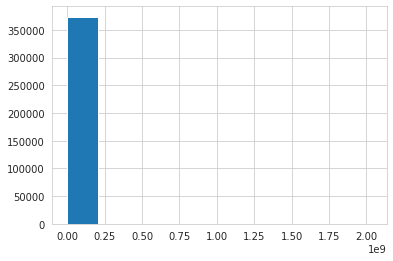

In [144]:
fig = plt.figure()
plt.hist(y)

---
>>> Log(y)
---

In [145]:
# Kolmogorov Test for Log(y)
kStat, kPvalue = sp.stats.kstest(rvs=np.log(y+1), cdf='norm') #cdf: cumulative distribution function ; <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

print(f'Statistics: {kStat}\nP-Value: {kPvalue}')

Statistics: 0.8617443062326564
P-Value: 0.0


(array([5.16750e+04, 2.19000e+02, 1.69880e+04, 3.67960e+04, 6.75930e+04,
        1.04578e+05, 8.00550e+04, 1.45410e+04, 1.39700e+03, 7.10000e+01]),
 array([ 0.        ,  2.14332203,  4.28664406,  6.42996609,  8.57328812,
        10.71661015, 12.85993218, 15.00325421, 17.14657624, 19.28989827,
        21.43322029]),
 <a list of 10 Patch objects>)

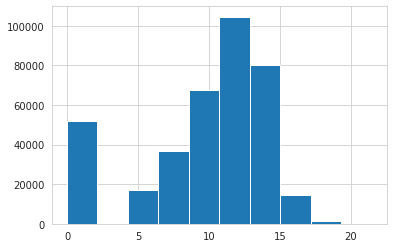

In [146]:
fig = plt.figure()
plt.hist(np.log(y+1))

---
>>> Inverse (1/y)
---

In [147]:
# Kolmogorov Test for 1/y
kStat, kPvalue = sp.stats.kstest(rvs=1/y, cdf='norm') #cdf: cumulative distribution function ; <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

print(f'Statistics: {kStat}\nP-Value: {kPvalue}')

Statistics: 0.5000000001961465
P-Value: 0.0


(array([322238.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  51675.]),
 array([4.91666589e-10, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

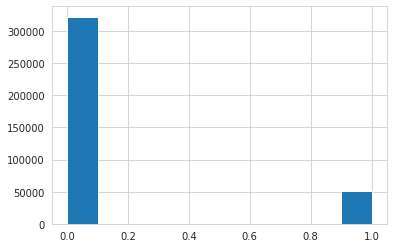

In [148]:
fig = plt.figure()
plt.hist(1/(y+1))

---
>>> Box-Cox Transformation
---

In [149]:
posdata = y[y > 0] # Find the optimal Box-Cox transformation, and verify that λ is positive. This work-around doesn't work if λ ≤ 0.

yBx = sp.stats.boxcox(posdata.values, alpha = 0.01) # alpha = 0.01 for 99% of confidence

print('Optimal Box-Cox Transformation: ', yBx[1])
print('Confidence Interval (99%): ', yBx[2])

Optimal Box-Cox Transformation:  0.06466605540351475
Confidence Interval (99%):  (0.06317712765365366, 0.06615516808768333)


In [150]:
# Kolmogorov Test for Box-Cox result
kStat, kPvalue = sp.stats.kstest(rvs=y ** yBx[1], cdf='norm') #cdf: cumulative distribution function ; <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

print(f'Statistics: {kStat}\nP-Value: {kPvalue}')

Statistics: 0.7700583062282631
P-Value: 0.0


(array([5.16750e+04, 0.00000e+00, 0.00000e+00, 2.55740e+04, 9.57670e+04,
        1.39141e+05, 5.57340e+04, 5.54400e+03, 4.49000e+02, 2.90000e+01]),
 array([0.        , 0.399883  , 0.79976599, 1.19964899, 1.59953199,
        1.99941499, 2.39929798, 2.79918098, 3.19906398, 3.59894697,
        3.99882997]),
 <a list of 10 Patch objects>)

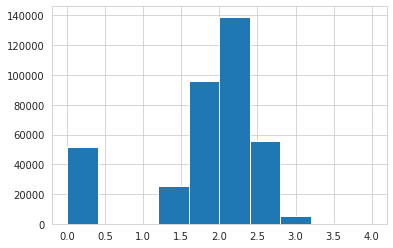

In [151]:
fig = plt.figure()
plt.hist(y ** yBx[1])

We're gonna choose the log(y) transformation because it seems more 'normally' distributed and has a better Kolmogorov result when compared to Box-Cox transformation

In [152]:
# Creating a new list to append log(y) and '0'
log_val = []
for v in list(y.values):
  if v == 0:
    log_val.append(v)
  else:
    log_val.append(np.log(v))

y_log_df = pd.DataFrame({'log_y':log_val})
y_log_df

,log_y
0,0.000000
1,12.397106
2,9.998798
3,4.605170
4,11.762127
...,...
373908,7.824046
373909,9.648595
373910,7.600902
373911,9.903488


### (c) Continuous Variables Analysis - X

For continuous variables, the transformation used will be the 'Scaling' method (or normalization). To facilitate the application of this operation, a function will be created.

In [153]:
def feat_scale(X):

  # Calculates the mean of all the variables
  mu = np.mean(X, axis = 0)

  # Calculates the std of all the variables
  sigma = np.std(X, axis = 0, ddof = 1)

  # Applies the normalization
  xNorm = (X-mu)/sigma

  return xNorm, mu, sigma

In [154]:
xNum = df3Num.copy()

xNorm, mu, sigma = feat_scale(xNum)

print('Scalled DF: \n', xNorm.head(),'\n\n')
print('Mean Value per Feature (Original DF): \n', mu,'\n\n')
print('STD per Feature (Original DF): \n', sigma)

Scalled DF: 
     pledged   backers  ...  release_day_of_month  release_day_of_week
0 -0.101633 -0.116947  ...             -0.844874             1.763115
1 -0.076378 -0.100513  ...             -0.730087             0.176197
2 -0.099338 -0.113660  ...             -1.648378             1.763115
3 -0.101623 -0.115852  ...              0.188203             1.234142
4 -0.088249 -0.101608  ...             -0.959660            -0.881748

[5 rows x 8 columns] 


Mean Value per Feature (Original DF): 
 pledged                 9.742735e+05
backers                 1.067397e+02
usd_goal_real           4.567483e+06
span_of_project         2.846073e+01
release_year            2.014241e+03
release_month           6.397630e+00
release_day_of_month    1.536040e+01
release_day_of_week     2.666906e+00
dtype: float64 


STD per Feature (Original DF): 
 pledged                 9.586159e+06
backers                 9.127163e+02
usd_goal_real           1.155570e+08
span_of_project         1.011176e+02
releas

### (d) Summaryzing all the Variables (x, Y) and creating a Final DF for the Model

---
>>> X Variables
---

In [155]:
xNorm.head()

,pledged,backers,usd_goal_real,span_of_project,release_year,release_month,release_day_of_month,release_day_of_week
0,-0.101633,-0.116947,-0.038198,-0.874830,0.392890,1.352205,-0.844874,1.763115
1,-0.076378,-0.100513,-0.013565,-0.578146,1.428513,-1.292051,-0.730087,0.176197
2,-0.099338,-0.113660,-0.000584,-3.040626,-0.642733,1.646012,-1.648378,1.763115
3,-0.101623,-0.115852,-0.035199,0.005333,-1.160544,-0.998245,0.188203,1.234142
4,-0.088249,-0.101608,-0.022651,1.132733,0.392890,-0.704439,-0.959660,-0.881748


In [156]:
xDum = df3_Cat_Dum.copy()
xDum.head()

,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,category_Anthologies,category_Apparel,category_Apps,category_Architecture,category_Art,category_Art Books,category_Audio,category_Bacon,category_Blues,category_Calendars,category_Camera Equipment,category_Candles,category_Ceramics,category_Children's Books,category_Childrenswear,category_Chiptune,category_Civic Design,category_Classical Music,category_Comedy,category_Comic Books,category_Comics,category_Community Gardens,category_Conceptual Art,category_Cookbooks,category_Country & Folk,category_Couture,category_Crafts,category_Crochet,category_DIY,category_DIY Electronics,category_Dance,category_Design,category_Digital Art,category_Documentary,...,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,state_canceled,state_failed,state_live,state_successful,state_suspended,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [157]:
X = pd.concat([xNorm, xDum], axis = 1)
X = pd.DataFrame(X)
X

,pledged,backers,usd_goal_real,span_of_project,release_year,release_month,release_day_of_month,release_day_of_week,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,category_Anthologies,category_Apparel,category_Apps,category_Architecture,category_Art,category_Art Books,category_Audio,category_Bacon,category_Blues,category_Calendars,category_Camera Equipment,category_Candles,category_Ceramics,category_Children's Books,category_Childrenswear,category_Chiptune,category_Civic Design,category_Classical Music,category_Comedy,category_Comic Books,category_Comics,category_Community Gardens,category_Conceptual Art,category_Cookbooks,category_Country & Folk,category_Couture,...,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,state_canceled,state_failed,state_live,state_successful,state_suspended,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,-0.101633,-0.116947,-0.038198,-0.874830,0.392890,1.352205,-0.844874,1.763115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.076378,-0.100513,-0.013565,-0.578146,1.428513,-1.292051,-0.730087,0.176197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.099338,-0.113660,-0.000584,-3.040626,-0.642733,1.646012,-1.648378,1.763115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.101623,-0.115852,-0.035199,0.005333,-1.160544,-0.998245,0.188203,1.234142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.088249,-0.101608,-0.022651,1.132733,0.392890,-0.704439,-0.959660,-0.881748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,-0.101373,-0.115852,0.003743,0.005333,-0.124921,0.764593,0.188203,-0.352775,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
378657,-0.100016,-0.111469,-0.038228,-0.024335,-1.678356,-0.116826,0.762135,-0.352775,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
378658,-0.101425,-0.115852,-0.026545,1.894223,-2.196167,-1.585858,-0.959660,0.176197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
378659,-0.099547,-0.110374,-0.026545,0.015223,0.910702,-1.585858,-0.270942,-0.352775,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


---
>>> System Response (Y)
---

In [158]:
y = y_log_df
y = y.rename({'log_y':'usd_pledged_real'},axis=1)
y

,usd_pledged_real
0,0.000000
1,12.397106
2,9.998798
3,4.605170
4,11.762127
...,...
373908,7.824046
373909,9.648595
373910,7.600902
373911,9.903488


### (e) OLS Formula (Patsy) for Regression Model --> Least Squares Method or Gradient-Descent

For formula construction using Patsy, the entire model must be explicitly specified. For small models, this activity is not a problem. However, for very large models this activity can be tedious and even error prone. Thus, it is suggested to build a function to "assemble" the formula

In [159]:
dfFinal = pd.concat([y[0:150], X[0:150]], axis = 1) #join y with xNorm --> Pandas has a memory limit (due to this we setted the max length as 150 rows)
dfFinal

,usd_pledged_real,pledged,backers,usd_goal_real,span_of_project,release_year,release_month,release_day_of_month,release_day_of_week,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,category_Anthologies,category_Apparel,category_Apps,category_Architecture,category_Art,category_Art Books,category_Audio,category_Bacon,category_Blues,category_Calendars,category_Camera Equipment,category_Candles,category_Ceramics,category_Children's Books,category_Childrenswear,category_Chiptune,category_Civic Design,category_Classical Music,category_Comedy,category_Comic Books,category_Comics,category_Community Gardens,category_Conceptual Art,category_Cookbooks,category_Country & Folk,...,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,state_canceled,state_failed,state_live,state_successful,state_suspended,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0.000000,-0.101633,-0.116947,-0.038198,-0.874830,0.392890,1.352205,-0.844874,1.763115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,12.397106,-0.076378,-0.100513,-0.013565,-0.578146,1.428513,-1.292051,-0.730087,0.176197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,9.998798,-0.099338,-0.113660,-0.000584,-3.040626,-0.642733,1.646012,-1.648378,1.763115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4.605170,-0.101623,-0.115852,-0.035199,0.005333,-1.160544,-0.998245,0.188203,1.234142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,11.762127,-0.088249,-0.101608,-0.022651,1.132733,0.392890,-0.704439,-0.959660,-0.881748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,7.600902,-0.101425,-0.114756,-0.034334,0.104228,-1.678356,-0.410633,0.417776,0.176197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
146,11.379394,-0.092506,-0.101608,-0.038660,1.221739,1.428513,-0.998245,-0.500515,1.234142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
147,4.962845,-0.101623,-0.115852,-0.027162,0.005333,0.910702,-0.410633,0.188203,-0.881748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
148,0.000000,-0.101633,-0.116947,-0.038732,-1.873667,-0.642733,0.470786,-1.648378,0.176197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [160]:
def ols_formula(df, dependent_var, *excluded_cols):

  # Lists the Features names
  df_columns = list(df.columns.values)

  # Remove all dependent variables
  df_columns.remove(dependent_var)

  # Remove excluded columns (if exists)
  for col in excluded_cols:
    df_columns.remove(col)
  
  return dependent_var + ' ~ ' + ' + '.join(df_columns)

# y, X =  pt.dmatrices(ols_formula(dfFinal, 'usd_pledged_real'), data = dfFinal, return_type = 'dataframe')

### (f) Regularized Regression: Ridge

---
>>> Splitting into Train and Test Data
---

In [161]:
X = X[0:150]
y = y[0:150]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Resets all DFs indexes
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 223)
(30, 223)
(120, 1)
(30, 1)


---
>>> Defining Ridge Regression Params
---

In [172]:
mdlRidge = Ridge()

In [173]:
# Grid to find best estimator (alpha)
grid = dict()
grid['alpha'] = np.arange(0,1,0.01)
grid

{'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99])}

In [174]:
# kFold Method
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

# Defines the "search" object
search = GridSearchCV(mdlRidge, grid, scoring = 'neg_root_mean_squared_error', cv = cv, n_jobs = -1)

# search for the best alpha
results = search.fit(X_train, y_train)

print('Config: ', results.best_params_)

Config:  {'alpha': 0.99}


In [176]:
alpha = results.best_params_['alpha']

# Model Setup
mdlRidge = Ridge(alpha=alpha)
mdlRidge.fit(X_train, y_train)

Ridge(alpha=0.99)

In [177]:
print(mdlRidge.coef_)

[[ 4.06326283e+00  1.34357312e+00 -5.22022818e-01  3.05845621e-01
  -1.09119215e-01  1.83197564e-02  3.80603538e-01 -2.19160673e-01
   0.00000000e+00  0.00000000e+00  2.87954527e-01  0.00000000e+00
   0.00000000e+00 -2.16791790e-01  1.14345036e+00  2.26988759e-01
   2.43817104e+00 -3.43741995e+00  1.19235555e+00  3.46780884e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.23794803e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.93711544e-01  0.00000000e+00 -7.40664876e-02  0.00000000e+00
   0.00000000e+00  4.46867419e-01  0.00000000e+00  0.00000000e+00
  -2.37918300e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -2.38466202e+00  2.09866560e+00  0.00000000e+00  8.06032707e-01
   2.98697111e-01  2.28509086e+00 -7.01458458e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   3.69247

In [179]:
# Predicting using test data
predTest = pd.DataFrame(np.exp(mdlRidge.predict(X_test)))

# Concatenates real and predicted values
predRidgeYLog = pd.concat([y_test, predTest], axis = 1)
predRidgeYLog.columns = ['usd_pledged_real', 'usd_pledged_predicted']

# Cria os resíduos
predRidgeYLog['res'] = predRidgeYLog.usd_pledged_real - predRidgeYLog.usd_pledged_predicted
predRidgeYLog

,usd_pledged_real,usd_pledged_predicted,res
0,6.907755,3.465134e+03,-3.458226e+03
1,10.980195,6.572143e+03,-6.561163e+03
2,11.845820,7.765097e+01,-6.580515e+01
3,8.517193,6.540114e+04,-6.539262e+04
4,10.721062,2.909881e+03,-2.899159e+03
5,11.233212,9.720214e+05,-9.720101e+05
6,10.764012,6.456700e+01,-5.380299e+01
7,9.186253,6.992677e+03,-6.983490e+03
8,0.000000,1.358959e+03,-1.358959e+03
9,9.553930,3.323692e+03,-3.314138e+03


In [180]:
print('R²:', metrics.r2_score(predRidgeYLog['usd_pledged_real'], predRidgeYLog['usd_pledged_predicted']))
print('Root Mean Square Error (RMSE):', np.sqrt(metrics.mean_squared_error(predRidgeYLog['usd_pledged_real'], predRidgeYLog['usd_pledged_predicted'])))

R²: -2.017013133695701e+16
Root Mean Square Error (RMSE): 583868689.8635637


---
>>> Residuals
---

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 29.]),
 array([-3.19794210e+09, -2.87814789e+09, -2.55835369e+09, -2.23855949e+09,
        -1.91876528e+09, -1.59897108e+09, -1.27917687e+09, -9.59382668e+08,
        -6.39588463e+08, -3.19794258e+08, -5.38029852e+01]),
 <a list of 10 Patch objects>)

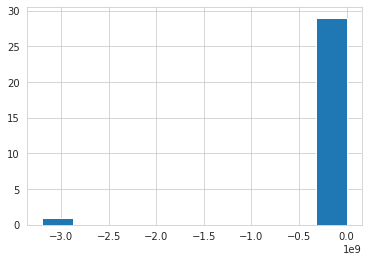

In [181]:
fig = plt.figure()
plt.hist(predRidgeYLog['res'])

Text(0, 0.5, 'Residuals')

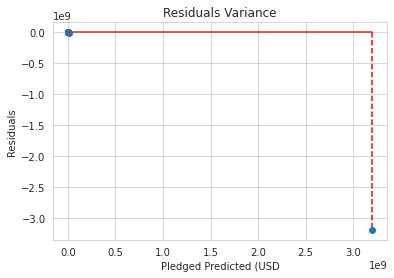

In [182]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.stem(predRidgeYLog['usd_pledged_predicted'], predRidgeYLog['res'],'--r')
ax.set_title('Residuals Variance')
ax.set_xlabel('Pledged Predicted (USD')
ax.set_ylabel('Residuals')